## Logistic Regression 

### Logistic Regression is the most famous ML algorithm. It is used for classification problem. It can be used for binary as well as multiclassification

The logistic function is a sigmoid function, which takes any real input t $$ t\in \mathbb {R} $$ and outputs a value between zero and one

Logistic Function(Sigmoid Function)
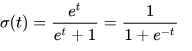

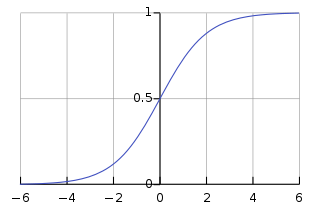

**odds**

The odds signifies the ratio of probability of success to probability of failure
$${\text{odds}}=e^{\beta _{0}+\beta _{1}x}.$$

**Log odds(Logit)**
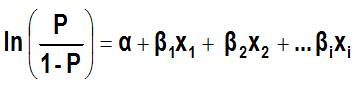


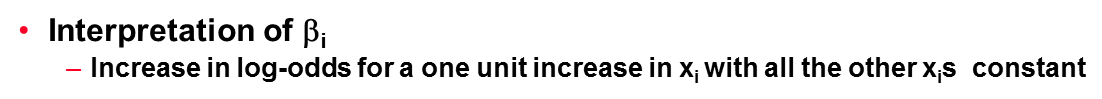

### Let's get started

In this tutorial we are using Titanic Dataset from kaggle.
You can download the data from https://www.kaggle.com/c/titanic/data 

### Data Description 

The data has been split into two groups:
training set (train.csv)
test set (test.csv)

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [5]:
##Reading Data
train=pd.read_csv('train.csv')

In [6]:
train.shape

(891, 12)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## Target variable
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
## Let's create dummy variables
embark=pd.get_dummies(train['Embarked'])

In [15]:
gender=pd.get_dummies(train['Sex'])

In [16]:
train['Age'].fillna(30,inplace=True)
train['Age']=train['Age'].astype('int')

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
def age_grp(age):
    if age<18:
        return '<18'
    elif (age>=18) &(age<=24):
        return '18-24'
    elif (age>=25) &(age<=34):
        return '25-34'
    elif (age>=35) &(age<=44):
        return '35-44'
    else:
        return '45+'
    

In [20]:
train['Age_grp']=train['Age'].apply(lambda x: age_grp(x))

In [21]:
age=pd.get_dummies(train['Age_grp'])

In [22]:
train_df=pd.concat([train,embark,gender,age],axis=1)

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_grp', 'C', 'Q',
       'S', 'female', 'male', '18-24', '25-34', '35-44', '45+', '<18'],
      dtype='object')

In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_grp          0
C                0
Q                0
S                0
female           0
male             0
18-24            0
25-34            0
35-44            0
45+              0
<18              0
dtype: int64

In [25]:
def is_var(val):
    if val>0:
        return 1
    else:
        return 0

In [27]:
train_df['Parch']=train_df['Parch'].apply(lambda x: is_var(x))
train_df['SibSp']=train_df['SibSp'].apply(lambda x: is_var(x))

In [28]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_grp', 'C', 'Q',
       'S', 'female', 'male', '18-24', '25-34', '35-44', '45+', '<18'],
      dtype='object')

In [29]:
sel_cols=[
    'Pclass', 'SibSp',
       'Parch',  'C', 'Q',
       'S', 'female', 'male', '18-24', '25-34', '35-44', '45+', '<18'
]

In [30]:
train_df.fillna(0,inplace=True)

In [31]:
X=train_df[sel_cols]

In [32]:
X.head()

,Pclass,SibSp,Parch,C,Q,S,female,male,18-24,25-34,35-44,45+,<18
0,3,1,0,0,0,1,0,1,1,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,1,0,0
2,3,0,0,0,0,1,1,0,0,1,0,0,0
3,1,1,0,0,0,1,1,0,0,0,1,0,0
4,3,0,0,0,0,1,0,1,0,0,1,0,0


In [33]:
y=train_df['Survived']

In [34]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
##Model
lr=LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
lr.score(train_X,train_y)

0.8218298555377207

In [37]:
lr.score(val_X,val_y)

0.77238805970149249

In [38]:
pred=lr.predict(val_X)

In [39]:
pred_prob=lr.predict_proba(val_X)

In [40]:
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [41]:
pred_prob

array([[ 0.15511184,  0.84488816],
       [ 0.93400617,  0.06599383],
       [ 0.10015058,  0.89984942],
       [ 0.39203743,  0.60796257],
       [ 0.09413539,  0.90586461],
       [ 0.92577403,  0.07422597],
       [ 0.80578974,  0.19421026],
       [ 0.10854174,  0.89145826],
       [ 0.54495623,  0.45504377],
       [ 0.41030844,  0.58969156],
       [ 0.93400617,  0.06599383],
       [ 0.50524984,  0.49475016],
       [ 0.71785851,  0.28214149],
       [ 0.83279534,  0.16720466],
       [ 0.39203743,  0.60796257],
       [ 0.63673407,  0.36326593],
       [ 0.81535429,  0.18464571],
       [ 0.93083465,  0.06916535],
       [ 0.92661626,  0.07338374],
       [ 0.2418991 ,  0.7581009 ],
       [ 0.93400617,  0.06599383],
       [ 0.9062783 ,  0.0937217 ],
       [ 0.06592241,  0.93407759],
       [ 0.81444622,  0.18555378],
       [ 0.17768588,  0.82231412],
       [ 0.93400617,  0.06599383],
       [ 0.0663834 ,  0.9336166 ],
       [ 0.24279125,  0.75720875],
       [ 0.83279534,

In [42]:
confusion_matrix(val_y,pred)

array([[134,  19],
       [ 42,  73]])

In [44]:
print(classification_report(val_y,pred))

             precision    recall  f1-score   support

          0       0.76      0.88      0.81       153
          1       0.79      0.63      0.71       115

avg / total       0.78      0.77      0.77       268



In [45]:
roc_auc_score(val_y,pred)

0.75529980107985217

In [46]:
lr.intercept_

array([ 1.16270008])

In [47]:
lr.coef_

array([[-1.04435243, -0.07606552,  0.06860324,  0.48598554,  0.48877108,
         0.02901494,  1.89581087, -0.73311079,  0.15093702,  0.02453125,
         0.13861592, -0.34811562,  1.19673151]])

In [48]:
np.exp(lr.coef_)

array([[ 0.35191964,  0.92675548,  1.0710112 ,  1.62577649,  1.63031147,
         1.02943998,  6.65794496,  0.4804122 ,  1.16292342,  1.02483462,
         1.14868283,  0.70601724,  3.30928286]])

In [49]:
pd.DataFrame({'coef':np.exp(lr.coef_)[0],'Variables':X.columns})

,Variables,coef
0,Pclass,0.351920
1,SibSp,0.926755
2,Parch,1.071011
3,C,1.625776
4,Q,1.630311
5,S,1.029440
6,female,6.657945
7,male,0.480412
8,18-24,1.162923
9,25-34,1.024835
